In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

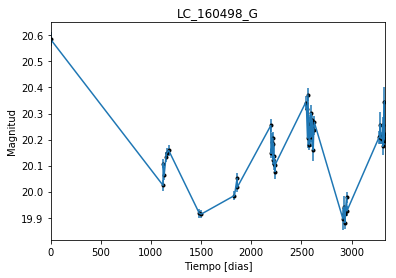

In [2]:
data = np.genfromtxt('LC_160498_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_160498_G')
plt.savefig("LC_160498_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

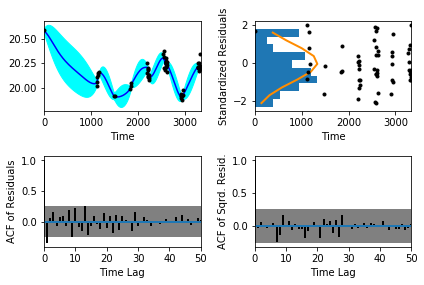

In [5]:
sample.assess_fit()

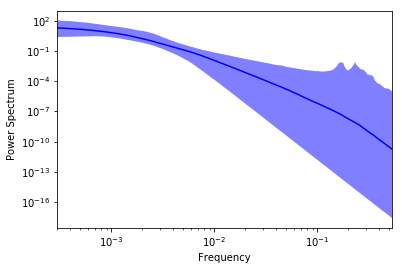

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

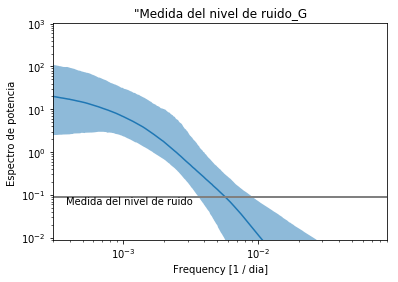

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_160498_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_160498_G')

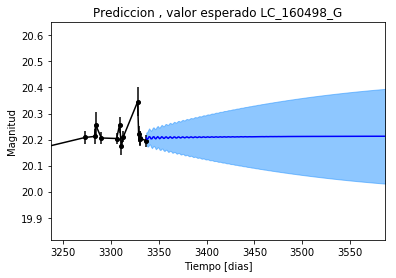

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_160498_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_160498_G')

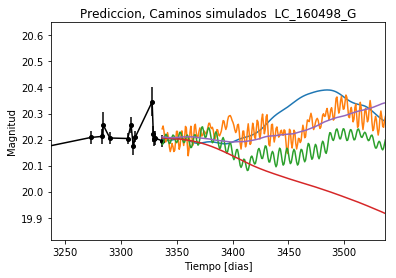

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_160498_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


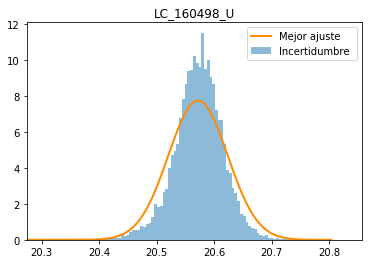

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_160498_U')
plt.savefig("Mejor_ajuste_LC_160498_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_160498_G')

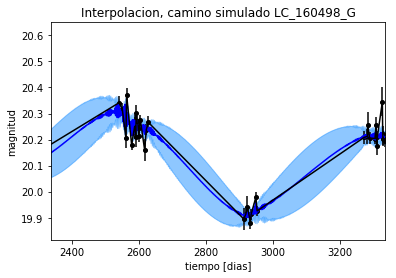

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_160498_G')

Text(0.5,1,'Interpolacion, camino simulado LC_160498_G')

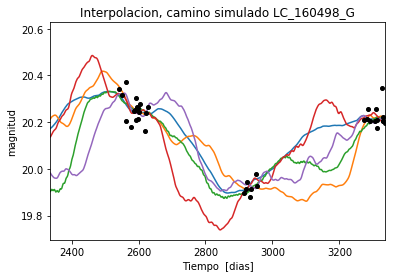

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_160498_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 370.685997567
Median: 0.00792580527282
Standard deviation: 0.171737864521
68% credibility interval: [ 0.00102438  0.10774499]
95% credibility interval: [  3.59193995e-04   6.93382343e-01]
99% credibility interval: [  3.10661529e-04   9.66583193e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1924.62150927
Median: 0.002806891486
Standard deviation: 0.0535953813961
68% credibility interval: [ 0.0005633   0.01621296]
95% credibility interval: [ 0.00032207  0.13561954]
99% credibility interval: [  3.04487714e-04   3.68601445e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 301.818256458
Median: 0.0168023194991
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 377.361753261
Median: 103.470655598
Standard deviation: 2.08617717884
68% credibility interval: [ 101.75800292  105.26553586]
95% credibility interval: [  99.17278722  107.91009341]
99% credibility interval: [  97.2396486   108.81477765]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 547.903596933
Median: 0.632150222303
Standard deviation: 1.9972128558
68% credibility interval: [ 0.0533539   3.65487349]
95% credibility interval: [ 0.0145812   6.62115433]
99% credibility interval: [ 0.01001549  8.93956152]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 924.55148482
Median: 0.920595294757
Standard deviation: 7.26412591508
68% credibility interval: [ 0.02132415  5.31043768]
95% credibility interval: [  9.25314813e-04 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1412.26791692
Median: 4.86619527908e-34
Standard deviation: 1.11438288948e+20
68% credibility interval: [  8.74437019e-59   9.49096445e-07]
95% credibility interval: [  5.28088581e-91   2.28424221e+07]
99% credibility interval: [  1.92927840e-115   3.70900456e+016]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1899.95720741
Median: 20.1740720429
Standard deviation: 0.113527031429
68% credibility interval: [ 20.08477377  20.28191825]
95% credibility interval: [ 19.97172701  20.41653517]
99% credibility interval: [ 19.84605996  20.55395272]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 762.648663718
Median: 0.0503878177244
Standard deviation: 0.219242961087
68% credibility interval: [ 0.          0.31327029]
95% credibility interval: [ 0.         0.8143602]
99% credibility interval: [ 0.         1.0152144]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 762.648663718
Median: 0.0503878177244
Standard deviation: 0.219242961087
68% credibility interval: [ 0.          0.31327029]
95% credibility interval: [ 0.         0.8143602]
99% credibility interval: [ 0.         1.0152144]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 395.571847782
Median: 0.0
Standard deviation: 0.000544158334277
68% credibilit

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 377.361753261
Median: 103.470655598
Standard deviation: 2.08617717884
68% credibility interval: [ 101.75800292  105.26553586]
95% credibility interval: [  99.17278722  107.91009341]
99% credibility interval: [  97.2396486   108.81477765]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 909.77499605
Median: 0.0467726529155
Standard deviation: 0.0615801002927
68% credibility interval: [ 0.02930904  0.08958652]
95% credibility interval: [ 0.01987053  0.19169793]
99% credibility interval: [ 0.01568504  0.38410467]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 282.970639017
Median: 1.54887349708
Standard deviation: 0.291250603872
68% credibility interval: [ 1.18528503  1.80393904]
95% credibility interval: [ 0.89304033  1.95828204]
99% credibility interval: [ 0.7571714   1.99137526]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 902.526394577
Median: 0.000366438854574
Standard deviation: 0.17458054161
68% credibility interval: [  4.39638073e-06   3.20807447e-02]
95% credibility interval: [  3.73684285e-12   2.91856275e-01]
99% credibility interval: [  2.18203979e-21   1.26227795e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 370.685997567
Median: (-0.0497993032377-1.39066742968j)
Standard deviation: 1.74985718235
68% credibility interval: [-0.67698171+0.j         -0.00643635-6.52069027j]
95% credibility interval: [ -4.35664975e+00+0.j          -2.25688243e-03-0.63898459j]
99% credibility interval: [ -6.07322132e+00+0.j          -1.95194395e-03-0.28269926j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1924.62150928
Median: (-0.0176362193437+0.0258058807604j)
Standard deviation: 1.41810728061
68% credibility interval: [-0.10186903+0.j -0.00353929+0.j]
95% credibility interval: [-0.85212268+4.38834238j -0.00202364+1.67993033j]
99% credibility interval: [ -2.31599119e+00+1.54823935j  -1.91315273e-03+0.j        ]
Posterior summary for parame